<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 20px; height: 55px">

# Project 2: Analyzing IMDb Data

_Author: Kevin Markham (DC)_

---

For project two, you will complete a serious of exercises exploring movie rating data from IMDb.

For these exercises, you will be conducting basic exploratory data analysis on IMDB's movie data, looking to answer such questions as:

What is the average rating per genre?
How many different actors are in a movie?

This process will help you practice your data analysis skills while becoming comfortable with Pandas.

## Basic level

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

#### Read in 'imdb_1000.csv' and store it in a DataFrame named movies.

In [37]:
movies = pd.read_csv('./data/imdb_1000.csv')
movies.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


#### Check the number of rows and columns.

In [38]:
# Answer:
movies.shape

(979, 6)

#### Check the data type of each column.

In [39]:
# Answer:
movies.dtypes

star_rating       float64
title              object
content_rating     object
genre              object
duration            int64
actors_list        object
dtype: object

#### Calculate the average movie duration.

In [40]:
# Answer:
movies.duration.mean()

120.97957099080695

#### Sort the DataFrame by duration to find the shortest and longest movies.

In [41]:
# Answer:
movies.sort_values(by='duration', ascending=False)

,star_rating,title,content_rating,genre,duration,actors_list
476,7.8,Hamlet,PG-13,Drama,242,"[u'Kenneth Branagh', u'Julie Christie', u'Dere..."
157,8.2,Gone with the Wind,G,Drama,238,"[u'Clark Gable', u'Vivien Leigh', u'Thomas Mit..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
142,8.3,Lagaan: Once Upon a Time in India,PG,Adventure,224,"[u'Aamir Khan', u'Gracy Singh', u'Rachel Shell..."
445,7.9,The Ten Commandments,APPROVED,Adventure,220,"[u'Charlton Heston', u'Yul Brynner', u'Anne Ba..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."
204,8.1,Ben-Hur,G,Adventure,212,"[u'Charlton Heston', u'Jack Hawkins', u'Stephe..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
767,7.6,"It's a Mad, Mad, Mad, Mad World",APPROVED,Action,205,"[u'Spencer Tracy', u'Milton Berle', u'Ethel Me..."
630,7.7,Malcolm X,PG-13,Biography,202,"[u'Denzel Washington', u'Angela Bassett', u'De..."


#### Create a histogram of duration, choosing an "appropriate" number of bins.

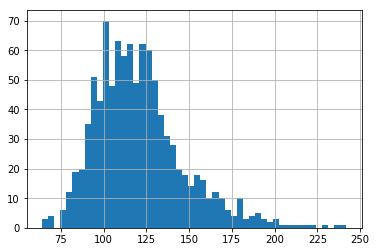

In [42]:
# Answer:
movies.duration.hist(bins=50)

#### Use a box plot to display that same data.

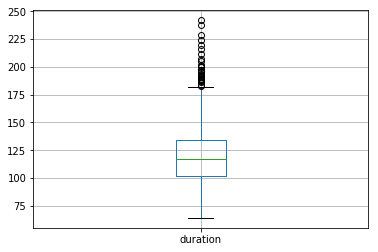

In [43]:
# Answer:
movies.boxplot(column = 'duration')

## Intermediate level

#### Count how many movies have each of the content ratings.

In [44]:
# Answer:
content = movies.groupby('content_rating').title.count()
print(content)

content_rating
APPROVED      47
G             32
GP             3
NC-17          7
NOT RATED     65
PASSED         7
PG           123
PG-13        189
R            460
TV-MA          1
UNRATED       38
X              4
Name: title, dtype: int64


#### Use a visualization to display that same data, including a title and x and y labels.

Text(0,0.5,'No. of Movies in each content rating')

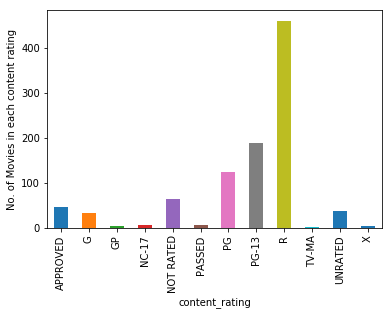

In [45]:
# Answer:
content.plot.bar()
plt.ylabel('No. of Movies in each content rating')

#### Convert the following content ratings to "UNRATED": NOT RATED, APPROVED, PASSED, GP.

In [46]:
# Answer:
#define new dataframe
movies.content_rating = movies.content_rating.replace(['NOT RATED', 'APPROVED', 'PASSED', 'GP'], 'UNRATED')

print(movies.groupby('content_rating').title.count())

content_rating
G           32
NC-17        7
PG         123
PG-13      189
R          460
TV-MA        1
UNRATED    160
X            4
Name: title, dtype: int64


#### Convert the following content ratings to "NC-17": X, TV-MA.

In [47]:
# Answer:
movies.content_rating = movies.content_rating.replace(['TV-MA', 'X'], 'NC-17')

print(movies.groupby('content_rating').title.count())

content_rating
G           32
NC-17       12
PG         123
PG-13      189
R          460
UNRATED    160
Name: title, dtype: int64


#### Count the number of missing values in each column.

In [48]:
# Answer:
movies.isnull().sum()

star_rating       0
title             0
content_rating    3
genre             0
duration          0
actors_list       0
dtype: int64

#### If there are missing values: examine them, then fill them in with "reasonable" values.

In [49]:
# Answer:
movies.loc[movies[movies['content_rating'].isnull()].index]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,NaN,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,NaN,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,NaN,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [50]:
#Answer:
movies.content_rating = movies.content_rating.fillna('UNRATED')

movies.iloc[[187,649,936]]

,star_rating,title,content_rating,genre,duration,actors_list
187,8.2,Butch Cassidy and the Sundance Kid,UNRATED,Biography,110,"[u'Paul Newman', u'Robert Redford', u'Katharin..."
649,7.7,Where Eagles Dare,UNRATED,Action,158,"[u'Richard Burton', u'Clint Eastwood', u'Mary ..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


#### Calculate the average star rating for movies 2 hours or longer, and compare that with the average star rating for movies shorter than 2 hours.

In [51]:
# Answer:
print("Average star rating for movies 2 hours or longer is " + str(movies[movies['duration'] >= 120].star_rating.mean()))
print("Average star rating for movies shorter than 2 hours is " + str(movies[movies['duration'] < 120].star_rating.mean()))

Average star rating for movies 2 hours or longer is 7.948898678414082
Average star rating for movies shorter than 2 hours is 7.838666666666657


#### Use a visualization to detect whether there is a relationship between duration and star rating.

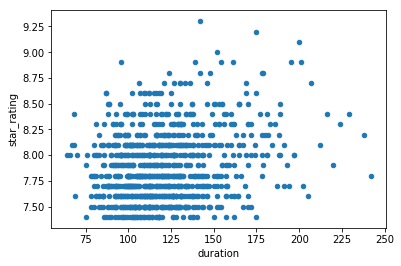

In [52]:
# Answer:
movies.plot.scatter('duration', 'star_rating')

#### Calculate the average duration for each genre.

In [53]:
# Answer:
movies.groupby('genre').duration.mean()

genre
Action       126.485294
Adventure    134.840000
Animation     96.596774
Biography    131.844156
Comedy       107.602564
Crime        122.298387
Drama        126.539568
Family       107.500000
Fantasy      112.000000
Film-Noir     97.333333
History       66.000000
Horror       102.517241
Mystery      115.625000
Sci-Fi       109.000000
Thriller     114.200000
Western      136.666667
Name: duration, dtype: float64

## Advanced level

#### Visualize the relationship between content rating and duration.

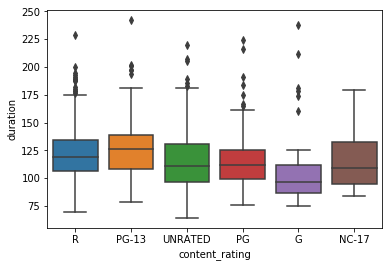

In [54]:
# Answer:
sns.boxplot(x="content_rating", y="duration", data=movies)

#### Determine the top rated movie (by star rating) for each genre.

In [69]:
# Answer:
movies.sort_values('star_rating', ascending=False).groupby('genre').title.first()

genre
Action                                     The Dark Knight
Adventure    The Lord of the Rings: The Return of the King
Animation                                    Spirited Away
Biography                                 Schindler's List
Comedy                                        Modern Times
Crime                             The Shawshank Redemption
Drama                                         12 Angry Men
Family                          E.T. the Extra-Terrestrial
Fantasy                          The City of Lost Children
Film-Noir                                    The Third Man
History                                Battleship Potemkin
Horror                                              Psycho
Mystery                                        Rear Window
Sci-Fi                                        Blade Runner
Thriller                                 Shadow of a Doubt
Western                     The Good, the Bad and the Ugly
Name: title, dtype: object

#### Check if there are multiple movies with the same title, and if so, determine if they are actually duplicates.

In [73]:
# Answer:
movies.loc[movies[movies.title.duplicated(keep=False)].index].sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
703,7.6,Dracula,UNRATED,Horror,85,"[u'Bela Lugosi', u'Helen Chandler', u'David Ma..."
905,7.5,Dracula,R,Horror,128,"[u'Gary Oldman', u'Winona Ryder', u'Anthony Ho..."
678,7.7,Les Miserables,PG-13,Drama,158,"[u'Hugh Jackman', u'Russell Crowe', u'Anne Hat..."
924,7.5,Les Miserables,PG-13,Crime,134,"[u'Liam Neeson', u'Geoffrey Rush', u'Uma Thurm..."
466,7.9,The Girl with the Dragon Tattoo,R,Crime,158,"[u'Daniel Craig', u'Rooney Mara', u'Christophe..."
482,7.8,The Girl with the Dragon Tattoo,R,Crime,152,"[u'Michael Nyqvist', u'Noomi Rapace', u'Ewa Fr..."
662,7.7,True Grit,PG-13,Adventure,110,"[u'Jeff Bridges', u'Matt Damon', u'Hailee Stei..."
936,7.4,True Grit,UNRATED,Adventure,128,"[u'John Wayne', u'Kim Darby', u'Glen Campbell']"


In [74]:
#While they have the same title, the "duplicated" movies are most probably different versions and might be a remake of such classical movies.

#### Calculate the average star rating for each genre, but only include genres with at least 10 movies


#### Option 1: manually create a list of relevant genres, then filter using that list

In [97]:
# Answer:
genre_count = movies.genre.value_counts()
print(genre_count)

Drama        278
Comedy       156
Action       136
Crime        124
Biography     77
Adventure     75
Animation     62
Horror        29
Mystery       16
Western        9
Thriller       5
Sci-Fi         5
Film-Noir      3
Family         2
Fantasy        1
History        1
Name: genre, dtype: int64


In [92]:
movies[movies['genre'].isin(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure', 'Animation', 'Horror', 'Mystery'])].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 2: automatically create a list of relevant genres by saving the value_counts and then filtering

In [95]:
# Answer:
top_genres = genre_count[genre_count >= 10].index
print(top_genres)

Index(['Drama', 'Comedy', 'Action', 'Crime', 'Biography', 'Adventure',
       'Animation', 'Horror', 'Mystery'],
      dtype='object')


In [96]:
movies[movies['genre'].isin(top_genres)].groupby('genre').star_rating.mean()

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 3: calculate the average star rating for all genres, then filter using a boolean Series

In [98]:
# Answer:
movies.groupby('genre').star_rating.mean()[movies.genre.value_counts() >= 10]

genre
Action       7.884559
Adventure    7.933333
Animation    7.914516
Biography    7.862338
Comedy       7.822436
Crime        7.916935
Drama        7.902518
Horror       7.806897
Mystery      7.975000
Name: star_rating, dtype: float64

#### Option 4: aggregate by count and mean, then filter using the count

In [104]:
# Answer:
aggregate = movies.groupby('genre').star_rating.agg(['count', 'mean']).sort_values('count', ascending=False)
print(aggregate)

           count      mean
genre                     
Drama        278  7.902518
Comedy       156  7.822436
Action       136  7.884559
Crime        124  7.916935
Biography     77  7.862338
Adventure     75  7.933333
Animation     62  7.914516
Horror        29  7.806897
Mystery       16  7.975000
Western        9  8.255556
Sci-Fi         5  7.920000
Thriller       5  7.680000
Film-Noir      3  8.033333
Family         2  7.850000
Fantasy        1  7.700000
History        1  8.000000


In [105]:
aggregate.loc[aggregate[aggregate['count'] >= 10].index]

,count,mean
genre,,
Drama,278,7.902518
Comedy,156,7.822436
Action,136,7.884559
Crime,124,7.916935
Biography,77,7.862338
Adventure,75,7.933333
Animation,62,7.914516
Horror,29,7.806897
Mystery,16,7.975000


## Bonus

#### Figure out something "interesting" using the actors data!

In [118]:
#extracting all rows for which an actor has acted in
movies.loc[movies[movies['actors_list'].str.contains('Morgan Freeman')].index]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
24,8.7,Se7en,R,Drama,127,"[u'Morgan Freeman', u'Brad Pitt', u'Kevin Spac..."
119,8.3,Unforgiven,R,Western,131,"[u'Clint Eastwood', u'Gene Hackman', u'Morgan ..."
227,8.1,Million Dollar Baby,PG-13,Drama,132,"[u'Hilary Swank', u'Clint Eastwood', u'Morgan ..."
549,7.8,Lucky Number Slevin,R,Crime,110,"[u'Josh Hartnett', u'Ben Kingsley', u'Morgan F..."
621,7.7,Gone Baby Gone,R,Crime,114,"[u'Morgan Freeman', u'Ed Harris', u'Casey Affl..."
943,7.4,The Bucket List,PG-13,Adventure,97,"[u'Jack Nicholson', u'Morgan Freeman', u'Sean ..."
962,7.4,Driving Miss Daisy,PG,Comedy,99,"[u'Morgan Freeman', u'Jessica Tandy', u'Dan Ay..."


In [150]:
#defining a function to find an actor's average star rating
def actor_rating(name):
    return movies[movies['actors_list'].str.contains(name)].star_rating.mean()

In [165]:
#defining a function to find an actor's average star rating
def movie_count(name):
    return movies[movies['actors_list'].str.contains(name)].star_rating.count()

In [151]:
actor_rating('Morgan Freeman')

8.0875

In [152]:
actor_rating('John Travolta')

8.9

In [163]:
#extract a list of all unique actor names

import re

all_actors = []
for i in movies.actors_list:
    movie_actors = re.findall(r"'(.*?)'", i)
    for k in movie_actors:
        all_actors.append(k)

all_actors = list(set(all_actors))        
print(len(all_actors))

1762


In [162]:
#extract a list of all unique actor ratings

actor_rating_list = []

for i in all_actors:
    actor_rating_list.append(actor_rating(str(i)))

print(len(actor_rating_list))

1762


In [166]:
#extract a list of the unique actor count of movies acted

actor_movie_count = []

for i in all_actors:
    actor_movie_count.append(movie_count(str(i)))

print(len(actor_movie_count))

1762


In [167]:
#creating a dataframe for all actors, their average star ratings and their movie counts
ratings = pd.DataFrame({'Actor Name': all_actors, 'Average Star Rating': actor_rating_list, 'Movie Count': actor_movie_count})

In [170]:
#find the top 10 actors based on average star ratings, only if they have acted in 3 or more movies
ratings[ratings['Movie Count'] > 2].sort_values('Average Star Rating', ascending=False).head(10)

,Actor Name,Average Star Rating,Movie Count
1265,Mark Hamill,8.633333,3
659,Henry Fonda,8.566667,3
1226,Marlon Brando,8.525000,4
780,Charles Chaplin,8.480000,5
363,Aamir Khan,8.400000,5
1134,Carrie Fisher,8.375000,4
21,Elijah Wood,8.300000,5
1722,Orson Welles,8.300000,3
312,Anne Hathaway,8.300000,3
1017,Janet Leigh,8.300000,3
